In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
# 데이터 불러오기
df = pd.read_csv('../dataset/volleyball_raw.csv')
df

,경기번호,팀명,경기날짜,결과,No.,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,...,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실
0,1,IBK기업은행,2017-10-14,0,19,메디 (L),O,O,O,O,...,20,3,5,6,1,0.6,21.28,1,0,7
1,1,IBK기업은행,2017-10-14,0,7,고예림 (L),O,O,O,O,...,10,0,7,3,0,0.0,10.64,0,0,6
2,1,IBK기업은행,2017-10-14,0,4,김희진 (R),O,O,O,O,...,14,4,6,3,0,0.8,14.89,1,0,6
3,1,IBK기업은행,2017-10-14,0,17,김미연 (L),O,O,O,O,...,12,2,2,7,0,0.4,12.77,3,0,1
4,1,IBK기업은행,2017-10-14,0,11,김수지 (C),O,O,O,O,...,28,1,13,9,0,0.2,29.79,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,474,KGC인삼공사,2022-02-28,0,14,김혜원 (S),O,NaN,2,NaN,...,2,0,1,1,0,0.0,4.44,0,0,0
10993,474,KGC인삼공사,2022-02-28,0,8,나현수 (C),NaN,17,12,NaN,...,1,0,0,1,0,0.0,2.22,0,0,2
10994,474,KGC인삼공사,2022-02-28,0,5,노란 (Li),LI,NaN,NaN,NaN,...,0,0,0,0,0,0.0,0.00,0,0,0
10995,474,KGC인삼공사,2022-02-28,0,15,이선우 (L),NaN,2,1,NaN,...,0,0,0,0,0,0.0,0.00,0,0,0


In [4]:
df.columns

Index(['경기번호', '팀명', '경기날짜', '결과', 'No.', '이름', '출전세트_1set', '출전세트_2set',
       '출전세트_3set', '출전세트_4set', '출전세트_5set', '득점_득점', '공격종합_시도', '공격종합_성공',
       '공격종합_공격차단', '공격종합_범실', '공격종합_성공률', '공격종합_점유율', '오픈_시도', '오픈_성공',
       '오픈_공격차단', '오픈_범실', '오픈_성공률', '오픈_점유율', '시간차_시도', '시간차_성공', '시간차_공격차단',
       '시간차_범실', '시간차_성공률', '시간차_점유율', '이동_시도', '이동_성공', '이동_공격차단', '이동_범실',
       '이동_성공률', '이동_점유율', '후위_시도', '후위_성공', '후위_공격차단', '후위_범실', '후위_성공률',
       '후위_점유율', '속공_시도', '속공_성공', '속공_공격차단', '속공_범실', '속공_성공률', '속공_점유율',
       '퀵오픈_시도', '퀵오픈_성공', '퀵오픈_공격차단', '퀵오픈_범실', '퀵오픈_성공률', '퀵오픈_점유율', '서브_시도',
       '서브_성공', '서브_범실', '서브_성공률', '서브_점유율', '디그_시도', '디그_성공', '디그_실패',
       '디그_범실', '디그_세트당', '디그_점유율', '세트_시도', '세트_성공', '세트_범실', '세트_세트당',
       '세트_점유율', '리시브_시도', '리시브_정확', '리시브_실패', '리시브_세트당', '리시브_점유율', '블로킹_시도',
       '블로킹_성공', '블로킹_유효블락', '블로킹_실패', '블로킹_범실', '블로킹_세트당', '블로킹_점유율',
       '블로킹_어시스트', '벌칙_벌칙', '범실_범실'],
      dtype='object')

In [5]:
# 3경기 이상 출전한 선수만 유지 (출전 세트 결측치가 3개 이상인 선수 제거)
subset = ['출전세트_1set', '출전세트_2set', '출전세트_3set', '출전세트_4set', '출전세트_5set']

# thresh = 3 : 정상 값(Not NaN)이 3개 이상만 유지
df = df.dropna(subset = subset, thresh = 3)
df

,경기번호,팀명,경기날짜,결과,No.,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,...,블로킹_시도,블로킹_성공,블로킹_유효블락,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실
0,1,IBK기업은행,2017-10-14,0,19,메디 (L),O,O,O,O,...,20,3,5,6,1,0.60,21.28,1,0,7
1,1,IBK기업은행,2017-10-14,0,7,고예림 (L),O,O,O,O,...,10,0,7,3,0,0.00,10.64,0,0,6
2,1,IBK기업은행,2017-10-14,0,4,김희진 (R),O,O,O,O,...,14,4,6,3,0,0.80,14.89,1,0,6
3,1,IBK기업은행,2017-10-14,0,17,김미연 (L),O,O,O,O,...,12,2,2,7,0,0.40,12.77,3,0,1
4,1,IBK기업은행,2017-10-14,0,11,김수지 (C),O,O,O,O,...,28,1,13,9,0,0.20,29.79,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,2022-02-28,0,12,한송이 (C),O,O,O,NaN,...,14,2,5,5,0,0.67,31.11,2,0,0
10989,474,KGC인삼공사,2022-02-28,0,17,정호영 (C),O,O,O,NaN,...,2,0,0,2,0,0.00,4.44,3,0,0
10990,474,KGC인삼공사,2022-02-28,0,16,고의정 (L),12,11,11,NaN,...,0,0,0,0,0,0.00,0.00,0,0,1
10991,474,KGC인삼공사,2022-02-28,0,2,하효림 (S),14,O,O,NaN,...,4,0,2,1,0,0.00,8.89,2,0,0


In [6]:
df.groupby(['팀명'], as_index = False)[['결과']].count().sort_values(by = '결과', ascending = False)

,팀명,결과
4,한국도로공사,1403
0,GS칼텍스,1398
6,흥국생명,1348
1,IBK기업은행,1285
5,현대건설,1221
2,KGC인삼공사,1197
3,페퍼저축은행,264


In [7]:
df.groupby(['팀명','이름'], as_index = False)[['결과']].count().sort_values(by = '결과', ascending = False).head(10)

,팀명,이름,결과
45,IBK기업은행,김수지 (C),154
164,한국도로공사,임명옥 (Li),154
166,한국도로공사,정대영 (C),152
147,한국도로공사,문정원 (R),152
148,한국도로공사,박정아 (L),151
196,현대건설,양효진 (C),148
184,현대건설,김연견 (Li),143
211,현대건설,황민경 (L),141
0,GS칼텍스,강소휘 (L),140
19,GS칼텍스,안혜진 (S),129


In [8]:
df.groupby(['팀명','이름'], as_index = False)[['득점_득점']].sum().sort_values(by = '득점_득점', ascending = False).head(10)

,팀명,이름,득점_득점
148,한국도로공사,박정아 (L),2647
196,현대건설,양효진 (C),2374
239,흥국생명,이재영 (L),2188
0,GS칼텍스,강소휘 (L),2082
97,KGC인삼공사,디우프 (R),1795
13,GS칼텍스,러츠 (R),1610
170,한국도로공사,켈시 (R),1483
72,IBK기업은행,어나이 (L),1351
27,GS칼텍스,이소영 (L),1344
103,KGC인삼공사,알레나 (R),1283


분석 기간 동안의 팀 별 승리 횟수, 선수 별 승리 횟수, 선수 별 득점을 살펴보면 팀이 같은 선수들의 경우 비슷한 값을 가지게 됨을 파악함.  
때문에 선수 별로 전처리를 수행했을 때, 서로 다른 선수라 하더라도 데이터에 팀에 대한 내용이 반영될 수 밖에 없을 것이라고 판단함. 즉, 선수 별 팀에 대한 데이터가 반영될 수 밖에 없고 이로 인해 발생한 중복으로 과적합이 발생할 수 있을 것이라고 결론 내림  
따라서, 우리 조는 기존에 선수 별로 데이터를 전처리 했던 방식이 아닌 **팀 별로 데이터를 전처리 하기로 결정**

추가적으로, 선수님과의 인터뷰를 통해 팀의 승율에 영향을 주는 것은 각각의 선수의 역량 보다는 **팀워크적인 측면이 중요함**을 알게됨  
또한, 키 플레이어의 역할에 대해 말씀 해주셨기 때문에 이런 부분을 데이터에 함께 반영해 **각 변수들은 팀 단위로 전처리 하되 기존엔 없던 MVP(키 플레이어)에 대한 변수를 추가적으로 생성**하기로 함

In [9]:
# 논문과 선수님 인터뷸ㄹ 통해 얻은 승리에 영향을 미치는 요인들을 따로 뽑아서 상관관계 파악
cols = ['경기번호', '팀명','결과','공격종합_시도', '공격종합_성공', '공격종합_공격차단', '공격종합_범실',
        '공격종합_성공률', '공격종합_점유율', '범실_범실', '디그_점유율', '리시브_점유율', '블로킹_점유율',
       '오픈_성공률', '후위_성공률', '속공_성공률', '퀵오픈_성공률', '서브_성공률']
df.loc[:,cols]

,경기번호,팀명,결과,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,범실_범실,디그_점유율,리시브_점유율,블로킹_점유율,오픈_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률
0,1,IBK기업은행,0,67,20,4,2,29.85,37.43,7,20.17,28.28,21.28,26.83,8.33,0.00,45.45,0.20
1,1,IBK기업은행,0,40,12,6,4,30.00,22.35,6,18.49,25.25,10.64,12.00,0.00,0.00,60.00,0.60
2,1,IBK기업은행,0,36,10,2,2,27.78,20.11,6,10.08,0.00,14.89,20.00,0.00,0.00,50.00,0.20
3,1,IBK기업은행,0,16,5,1,0,31.25,8.94,1,5.04,1.01,12.77,16.67,0.00,0.00,60.00,0.00
4,1,IBK기업은행,0,16,4,1,2,25.00,8.94,3,9.24,0.00,29.79,0.00,0.00,16.67,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,474,KGC인삼공사,0,7,2,2,0,28.57,7.00,0,11.67,0.00,31.11,0.00,0.00,66.67,0.00,0.00
10989,474,KGC인삼공사,0,5,3,1,0,60.00,5.00,0,1.67,0.00,4.44,66.67,0.00,50.00,0.00,0.00
10990,474,KGC인삼공사,0,3,0,0,0,0.00,3.00,1,5.00,4.23,0.00,0.00,0.00,0.00,0.00,0.33
10991,474,KGC인삼공사,0,0,0,0,0,0.00,0.00,0,5.00,1.41,8.89,0.00,0.00,0.00,0.00,0.33


<AxesSubplot:title={'center':'vollyball data understanding'}>

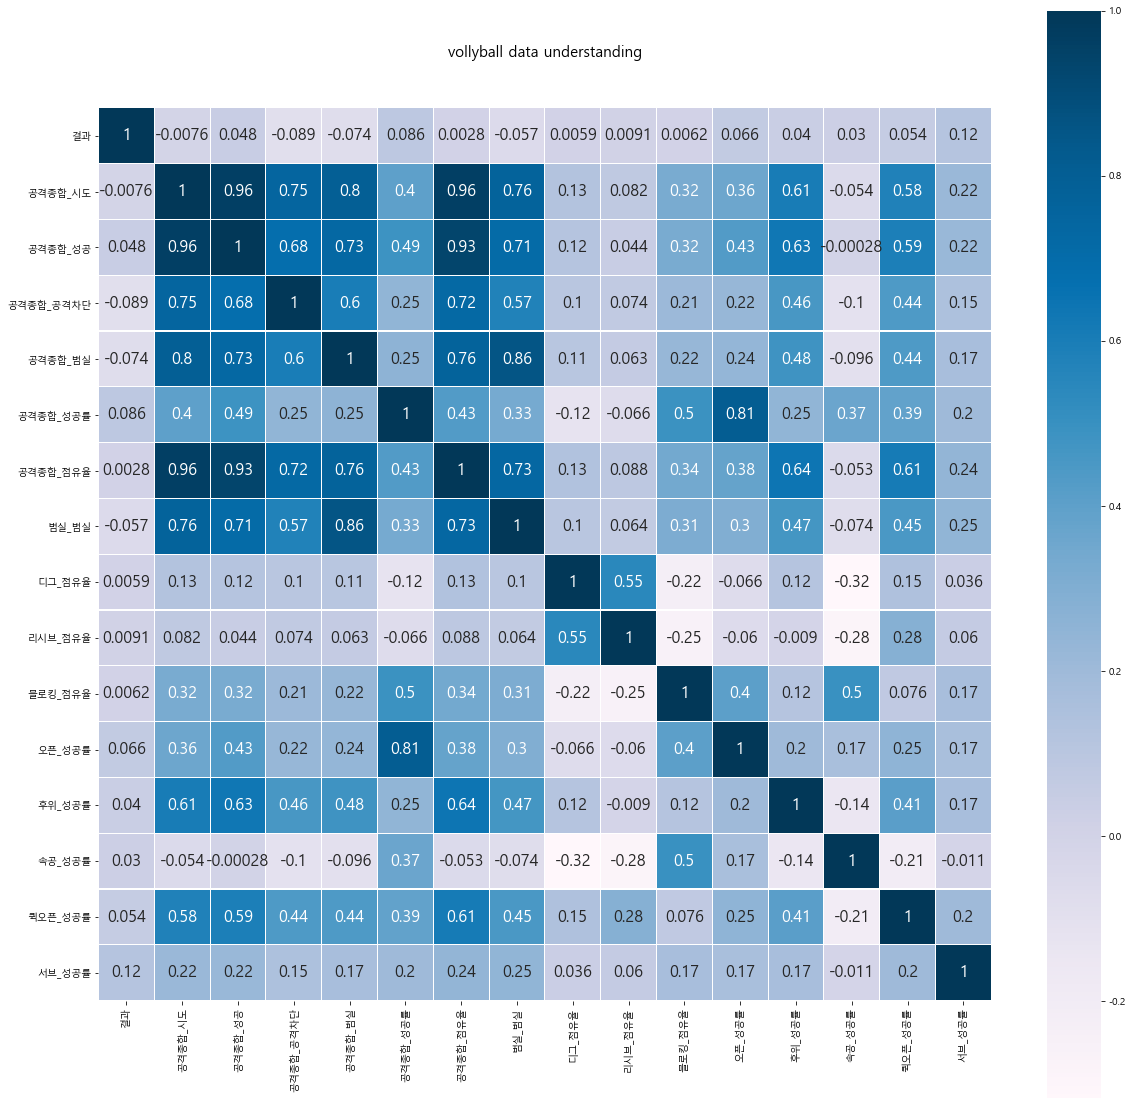

In [10]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 20))
plt.title("vollyball data understanding", y = 1.05, size = 15)
sns.heatmap(df.loc[:,cols].iloc[:,2:].astype(float).corr(),
            linewidths = 0.1, vmax = 1.0, square = True,
            cmap = colormap, linecolor = "white",
            annot = True, annot_kws = {"size" : 16})

# 독립변수 간의 다중공선성 문제가 우려됨
## 종속변수와 독립변수 간의 유의미한 상관관계를 찾기 어려움

In [11]:
temp = df.loc[:,cols].groupby(['경기번호', '팀명'], as_index = False).mean()
temp

,경기번호,팀명,결과,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,범실_범실,디그_점유율,리시브_점유율,블로킹_점유율,오픈_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률
0,1,IBK기업은행,0.0,22.375000,6.375000,1.875000,1.250000,17.985000,12.500000,3.125000,12.498750,12.498750,12.501250,9.437500,1.041250,2.083750,26.931250,0.175000
1,1,흥국생명,1.0,17.454545,5.727273,0.909091,1.363636,12.320000,9.041818,2.454545,9.029091,9.090909,8.840000,6.898182,6.046364,5.627273,15.150909,0.127273
2,2,KGC인삼공사,0.0,22.555556,7.333333,2.222222,0.666667,32.868889,11.003333,1.444444,10.957778,11.111111,10.967778,35.226667,4.444444,2.222222,12.036667,0.122222
3,2,현대건설,1.0,22.000000,8.555556,0.777778,1.333333,20.770000,11.112222,3.222222,11.112222,11.111111,11.112222,14.957778,11.111111,13.226667,13.457778,0.111111
4,3,GS칼텍스,1.0,15.818182,6.545455,0.818182,0.818182,27.587273,9.039091,2.272727,9.010000,9.090000,9.090909,22.803636,12.500000,15.426364,10.505455,0.163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,472,흥국생명,0.0,14.714286,4.428571,1.142857,1.142857,23.755714,13.624286,2.142857,12.698571,13.407143,13.987143,20.237143,4.761429,10.714286,20.271429,0.142857
944,473,페퍼저축은행,0.0,13.142857,3.428571,1.142857,0.714286,21.275714,10.685714,1.142857,12.170000,10.874286,14.287143,29.907143,1.785714,0.000000,8.571429,0.047143
945,473,한국도로공사,1.0,15.142857,6.857143,0.571429,0.428571,38.804286,13.892857,1.428571,11.938571,12.605714,12.134286,33.334286,22.857143,20.000000,26.957143,0.188571
946,474,GS칼텍스,1.0,11.125000,6.250000,1.000000,0.000000,45.481250,12.223750,0.875000,12.311250,12.498750,12.286250,31.101250,4.166250,16.250000,20.936250,0.208750


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
temp['팀명'] = encoder.fit_transform(temp['팀명'])
temp

,경기번호,팀명,결과,공격종합_시도,공격종합_성공,공격종합_공격차단,공격종합_범실,공격종합_성공률,공격종합_점유율,범실_범실,디그_점유율,리시브_점유율,블로킹_점유율,오픈_성공률,후위_성공률,속공_성공률,퀵오픈_성공률,서브_성공률
0,1,1,0.0,22.375000,6.375000,1.875000,1.250000,17.985000,12.500000,3.125000,12.498750,12.498750,12.501250,9.437500,1.041250,2.083750,26.931250,0.175000
1,1,6,1.0,17.454545,5.727273,0.909091,1.363636,12.320000,9.041818,2.454545,9.029091,9.090909,8.840000,6.898182,6.046364,5.627273,15.150909,0.127273
2,2,2,0.0,22.555556,7.333333,2.222222,0.666667,32.868889,11.003333,1.444444,10.957778,11.111111,10.967778,35.226667,4.444444,2.222222,12.036667,0.122222
3,2,5,1.0,22.000000,8.555556,0.777778,1.333333,20.770000,11.112222,3.222222,11.112222,11.111111,11.112222,14.957778,11.111111,13.226667,13.457778,0.111111
4,3,0,1.0,15.818182,6.545455,0.818182,0.818182,27.587273,9.039091,2.272727,9.010000,9.090000,9.090909,22.803636,12.500000,15.426364,10.505455,0.163636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,472,6,0.0,14.714286,4.428571,1.142857,1.142857,23.755714,13.624286,2.142857,12.698571,13.407143,13.987143,20.237143,4.761429,10.714286,20.271429,0.142857
944,473,3,0.0,13.142857,3.428571,1.142857,0.714286,21.275714,10.685714,1.142857,12.170000,10.874286,14.287143,29.907143,1.785714,0.000000,8.571429,0.047143
945,473,4,1.0,15.142857,6.857143,0.571429,0.428571,38.804286,13.892857,1.428571,11.938571,12.605714,12.134286,33.334286,22.857143,20.000000,26.957143,0.188571
946,474,0,1.0,11.125000,6.250000,1.000000,0.000000,45.481250,12.223750,0.875000,12.311250,12.498750,12.286250,31.101250,4.166250,16.250000,20.936250,0.208750


<AxesSubplot:title={'center':'vollyball data understanding'}>

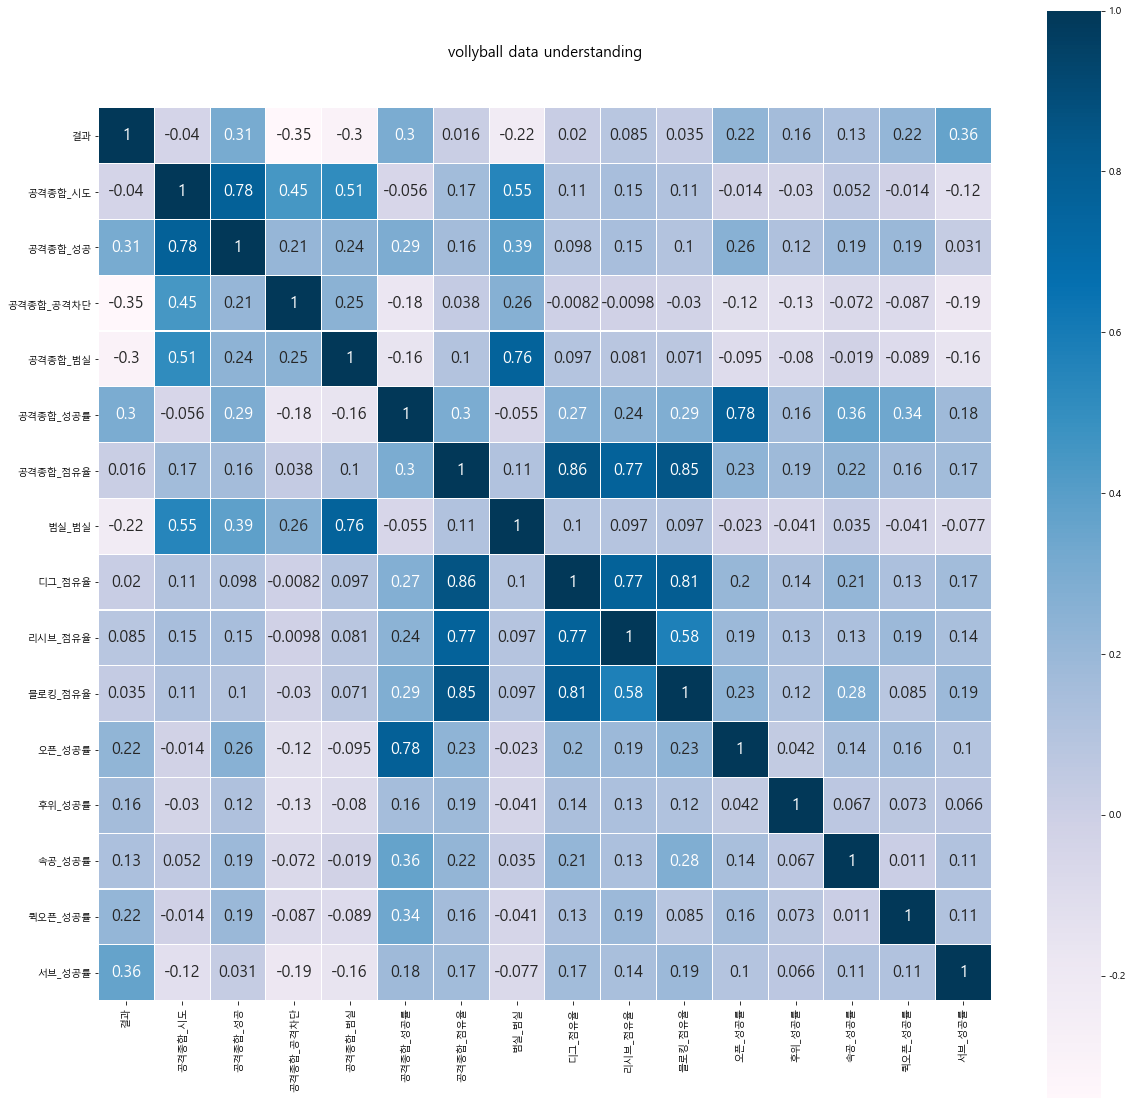

In [13]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 20))
plt.title("vollyball data understanding", y = 1.05, size = 15)
sns.heatmap(temp.iloc[:,2:].astype(float).corr(),
            linewidths = 0.1, vmax = 1.0, square = True,
            cmap = colormap, linecolor = "white",
            annot = True, annot_kws = {"size" : 16})

# 우선 이전 히트맵에서 선수 별 점수와 승패는 별로 상관이 없었기 때문에 각 항목을 경기와 팀별로 평균적인 점수로 산출해서 상관관계 파악해봄
## 여전히 낮긴 하지만 그래도 이전에 비해 오름
### 각 변수 별 특징을 딱히 고려하지 않고 평균만 냈는데도 이전보다 결과가 좋아짐

In [14]:
# 경기 별 팀의 총 득점 컬럼 생성
total_s = df.groupby(['경기날짜','팀명'], as_index = False)[['득점_득점']].sum().rename(columns = {'득점_득점':'팀_득점'})
df = pd.merge(df, total_s, on=['팀명', '경기날짜'])
df['득점점유율'] = df['득점_득점'] / df['팀_득점']

In [15]:
# 시즌 별 MVP 선정을 위해 시즌에 대한 컬럼 추기
df['season'] = np.where(df['경기날짜'] <= '2018-03-27', 1,
                          np.where(df['경기날짜'] <= '2019-03-27', 2,
                                  np.where(df['경기날짜'] <= '2020-03-01', 3,
                                          np.where(df['경기날짜'] <= '2021-03-30', 4,5))))
df

,경기번호,팀명,경기날짜,결과,No.,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,...,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,팀_득점,득점점유율,season
0,1,IBK기업은행,2017-10-14,0,19,메디 (L),O,O,O,O,...,6,1,0.60,21.28,1,0,7,69,0.347826,1
1,1,IBK기업은행,2017-10-14,0,7,고예림 (L),O,O,O,O,...,3,0,0.00,10.64,0,0,6,69,0.217391,1
2,1,IBK기업은행,2017-10-14,0,4,김희진 (R),O,O,O,O,...,3,0,0.80,14.89,1,0,6,69,0.217391,1
3,1,IBK기업은행,2017-10-14,0,17,김미연 (L),O,O,O,O,...,7,0,0.40,12.77,3,0,1,69,0.101449,1
4,1,IBK기업은행,2017-10-14,0,11,김수지 (C),O,O,O,O,...,9,0,0.20,29.79,2,0,3,69,0.086957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,474,KGC인삼공사,2022-02-28,0,12,한송이 (C),O,O,O,NaN,...,5,0,0.67,31.11,2,0,0,45,0.088889,5
8112,474,KGC인삼공사,2022-02-28,0,17,정호영 (C),O,O,O,NaN,...,2,0,0.00,4.44,3,0,0,45,0.066667,5
8113,474,KGC인삼공사,2022-02-28,0,16,고의정 (L),12,11,11,NaN,...,0,0,0.00,0.00,0,0,1,45,0.022222,5
8114,474,KGC인삼공사,2022-02-28,0,2,하효림 (S),14,O,O,NaN,...,1,0,0.00,8.89,2,0,0,45,0.022222,5


In [16]:
# 각 시즌별, 팀 별 선수들의 평균 득점점유율을 통해 MVP 선수 선정
## MVP 선수는 1, 아니면 0
mvp_s = df.groupby(['season', '팀명'], as_index = False)[['이름', '득점점유율']].max()
mvp_s['MVP'] = 1
mvp_s

,season,팀명,이름,득점점유율,MVP
0,1,GS칼텍스,한수진 (L),0.600000,1
1,1,IBK기업은행,최수빈 (Li),0.600000,1
2,1,KGC인삼공사,한수지 (C),0.607595,1
3,1,한국도로공사,하효림 (S),0.512821,1
4,1,현대건설,황연주 (R),0.428571,1
5,1,흥국생명,한지현 (L),0.612903,1
6,2,GS칼텍스,한수진 (S),0.480769,1
7,2,IBK기업은행,한지현 (Li),0.526316,1
8,2,KGC인삼공사,한수지 (C),0.580000,1
9,2,한국도로공사,하혜진 (L),0.508197,1


In [17]:
df.loc[(df['이름']=='최윤이 (L)')&(df['season']==1)]

,경기번호,팀명,경기날짜,결과,No.,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,...,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,팀_득점,득점점유율,season


In [18]:
df.loc[(df['이름']=='한수진 (L)')&(df['season']==1)]

,경기번호,팀명,경기날짜,결과,No.,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,...,블로킹_실패,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,팀_득점,득점점유율,season
184,11,GS칼텍스,2017-10-31,0,12,한수진 (L),10,10,6,NaN,...,0,0,0.0,2.00,0,0,3,47,0.021277,1
219,13,GS칼텍스,2017-11-04,1,12,한수진 (L),O,9,NaN,10,...,0,0,0.0,0.00,0,0,0,85,0.000000,1
287,16,GS칼텍스,2017-11-08,1,12,한수진 (L),10,O,O,O,...,1,0,0.0,2.94,0,0,4,88,0.000000,1
585,34,GS칼텍스,2017-12-06,0,12,한수진 (L),9,7,O,NaN,...,1,0,0.0,8.33,0,0,0,45,0.044444,1
685,40,GS칼텍스,2017-12-16,0,12,한수진 (L),9,9,10,NaN,...,0,0,0.0,0.00,0,0,0,41,0.000000,1
773,45,GS칼텍스,2017-12-25,0,12,한수진 (L),10,10,10,9,...,0,0,0.0,0.00,0,0,0,75,0.000000,1
808,47,GS칼텍스,2017-12-30,0,12,한수진 (L),10,9,10,9,...,0,0,0.0,0.00,0,0,1,69,0.000000,1
904,53,GS칼텍스,2018-01-09,0,12,한수진 (L),10,17,10,10,...,0,0,0.0,0.00,0,0,0,88,0.000000,1
992,58,GS칼텍스,2018-01-16,0,12,한수진 (L),18,NaN,18,10,...,0,0,0.0,0.00,0,0,0,62,0.000000,1
1076,63,GS칼텍스,2018-01-28,1,12,한수진 (L),O,O,10,NaN,...,2,0,0.0,6.52,0,0,2,52,0.000000,1


In [19]:
# 득점 점유율로 팀별 경기별 MVP 선수 컬럼 생성
## MVP 선수는 1, 아니면 0
df = pd.merge(df, mvp_s.drop('득점점유율',1), how = 'left' , on=['팀명', '이름', 'season'])
df.fillna(0, inplace = True)
df['MVP'] = df['MVP'].astype('int')
df

,경기번호,팀명,경기날짜,결과,No.,이름,출전세트_1set,출전세트_2set,출전세트_3set,출전세트_4set,...,블로킹_범실,블로킹_세트당,블로킹_점유율,블로킹_어시스트,벌칙_벌칙,범실_범실,팀_득점,득점점유율,season,MVP
0,1,IBK기업은행,2017-10-14,0,19,메디 (L),O,O,O,O,...,1,0.60,21.28,1,0,7,69,0.347826,1,0
1,1,IBK기업은행,2017-10-14,0,7,고예림 (L),O,O,O,O,...,0,0.00,10.64,0,0,6,69,0.217391,1,0
2,1,IBK기업은행,2017-10-14,0,4,김희진 (R),O,O,O,O,...,0,0.80,14.89,1,0,6,69,0.217391,1,0
3,1,IBK기업은행,2017-10-14,0,17,김미연 (L),O,O,O,O,...,0,0.40,12.77,3,0,1,69,0.101449,1,0
4,1,IBK기업은행,2017-10-14,0,11,김수지 (C),O,O,O,O,...,0,0.20,29.79,2,0,3,69,0.086957,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,474,KGC인삼공사,2022-02-28,0,12,한송이 (C),O,O,O,0,...,0,0.67,31.11,2,0,0,45,0.088889,5,1
8112,474,KGC인삼공사,2022-02-28,0,17,정호영 (C),O,O,O,0,...,0,0.00,4.44,3,0,0,45,0.066667,5,0
8113,474,KGC인삼공사,2022-02-28,0,16,고의정 (L),12,11,11,0,...,0,0.00,0.00,0,0,1,45,0.022222,5,0
8114,474,KGC인삼공사,2022-02-28,0,2,하효림 (S),14,O,O,0,...,0,0.00,8.89,2,0,0,45,0.022222,5,0


In [20]:
len(df.loc[(df['MVP'] == 1)&(df['결과'] == 1)])/len(df.loc[df['MVP'] == 1])

0.44676409185803756

In [21]:
len(df.loc[(df['MVP'] == 0)&(df['결과'] == 1)])/len(df.loc[df['MVP'] == 0])

0.5101479638601545

In [22]:
temp_1 = df.groupby(['경기번호','팀명'], as_index = False)[['결과','MVP']].sum()
temp_1['결과'] = temp_1['결과'].apply(lambda x : 1 if x >= 1 else 0)
temp_1

,경기번호,팀명,결과,MVP
0,1,IBK기업은행,0,0
1,1,흥국생명,1,1
2,2,KGC인삼공사,0,0
3,2,현대건설,1,1
4,3,GS칼텍스,1,0
...,...,...,...,...
943,472,흥국생명,0,1
944,473,페퍼저축은행,0,1
945,473,한국도로공사,1,0
946,474,GS칼텍스,1,0


In [30]:
len(temp_1.loc[(temp_1['MVP'] == 1)&(temp_1['결과'] == 1)&(temp_1['팀명']=='IBK기업은행')])/len(temp_1.loc[(temp_1['MVP']==1)&(temp_1['팀명']=='IBK기업은행')])

0.5081967213114754

In [31]:
len(temp_1.loc[(temp_1['MVP'] == 0)&(temp_1['결과'] == 1)&(temp_1['팀명']=='IBK기업은행')])/len(temp_1.loc[(temp_1['MVP']==0)&(temp_1['팀명']=='IBK기업은행')])

0.42105263157894735

In [ ]:
# 팀별로 약간의 차이가 존재하긴 하지만, MVp선수가 출전했을 때의 승률이 높아짐을 확인